In [70]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

##loading data

In [71]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


##Display smaple of trainging data

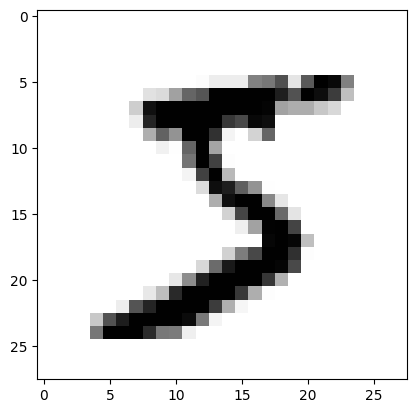

In [72]:
plt.imshow(X_train[0], cmap="binary")

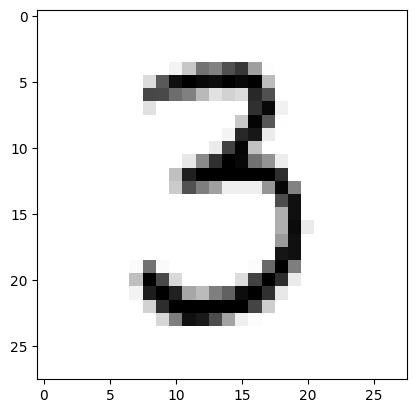

In [73]:
plt.imshow(X_train[50], cmap="binary")

##Preloading the data(scaling, normalizing)

In [74]:
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

##Training Model

In [75]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28, 28)))
model.add(tf.keras.layers.Dense(128, activation = "relu")) #rectified linear unit(relu)
model.add(tf.keras.layers.Dense(128, activation = "relu"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

In [76]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 128)               100480    
                                                                 
 dense_31 (Dense)            (None, 128)               16512     
                                                                 
 dense_32 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
model.fit(X_train, y_train, epochs = 3)
model.save("Handwritten.model")

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2611 - accuracy: 0.9247
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1062 - accuracy: 0.9676
Epoch 3/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0722 - accuracy: 0.9777


In [78]:
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1055 - accuracy: 0.9681
